# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

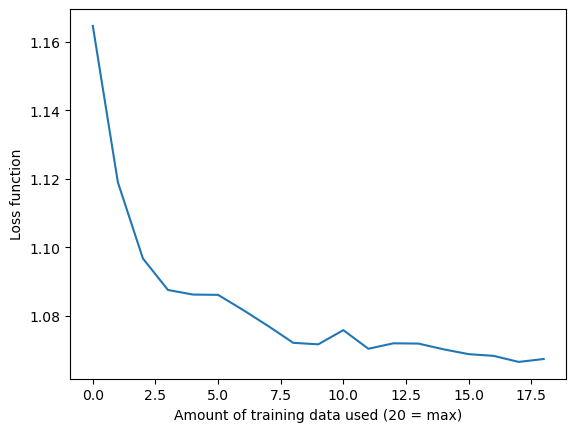

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

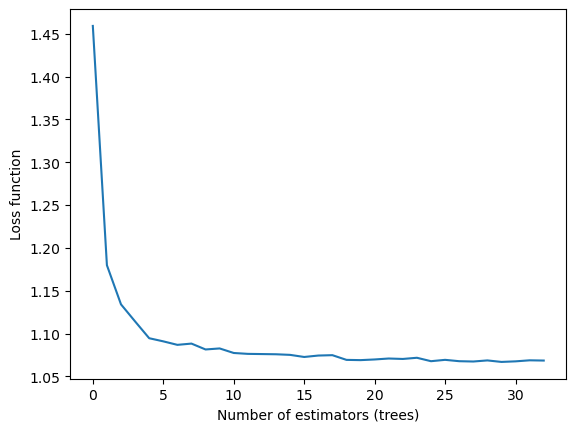

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

It appears the amount of training data used is more important. We do not observe a plateuing in the first chart, which means as we increase the amount of training data, we will likely continue to see improvements in lowering our RMSE.

However, the same cannot be said about the second graph. We observe RMSE platueing early on and stabilizes around 12 trees. Meaning we do not see improvements of RMSE after ~12 trees.

While both are informative, the first plot suggests that the model has more room for improvement and that we are missing out on gains of improvement. If we wanted to include only one plot, it would be the first one.

---

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [ ]:
cyber_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/cyber_security_attacks/cybersecurity_attacks.csv')
beth_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/beth_dataset/labelled_training_data.csv')
UNSW_df = pd.read_parquet('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/UNSW-NB15 dataset/UNSW_NB15_training-set.parquet')

## Investigate features

In [ ]:
cyber_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
cyber_df['Device Information'].value_counts() #create new feature, extract OS fom each row

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

In [ ]:
cyber_df['Geo-location Data']

0                   Jamshedpur, Sikkim
1                   Bilaspur, Nagaland
2                    Bokaro, Rajasthan
3                   Jaunpur, Rajasthan
4                   Anantapur, Tripura
                     ...              
39995                  Nashik, Manipur
39996                Vadodara, Mizoram
39997    Mahbubnagar, Himachal Pradesh
39998      Rourkela, Arunachal Pradesh
39999         Pudukkottai, West Bengal
Name: Geo-location Data, Length: 40000, dtype: object

In [ ]:
geo_split = cyber_df['Geo-location Data'].str.split(',', expand=True)
geo_split.columns = ['City', 'State']
cyber_df[['City', 'State']] = geo_split

In [ ]:
cyber_df['State'].value_counts()

State
Manipur              1498
Uttar Pradesh        1485
Gujarat              1483
Maharashtra          1474
Arunachal Pradesh    1472
Karnataka            1467
West Bengal          1465
Bihar                1462
Rajasthan            1460
Uttarakhand          1441
Haryana              1440
Nagaland             1439
Mizoram              1438
Jharkhand            1437
Kerala               1416
Sikkim               1410
Odisha               1410
Assam                1404
Meghalaya            1403
Chhattisgarh         1400
Goa                  1399
Andhra Pradesh       1399
Telangana            1393
Tamil Nadu           1393
Himachal Pradesh     1384
Tripura              1381
Punjab               1374
Madhya Pradesh       1373
Name: count, dtype: int64

As this is synthetic data, we can observe a uniform distribution across states. **I'll drop Geo-location data**

In [ ]:
cyber_df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
City                          0
State                         0
dtype: int64

In [ ]:
cyber_df['Malware Indicators'] #binarize

0        IoC Detected
1        IoC Detected
2        IoC Detected
3                 NaN
4                 NaN
             ...     
39995    IoC Detected
39996    IoC Detected
39997    IoC Detected
39998    IoC Detected
39999             NaN
Name: Malware Indicators, Length: 40000, dtype: object

In [ ]:
cyber_df['Alerts/Warnings'] # binarize

0                    NaN
1                    NaN
2        Alert Triggered
3        Alert Triggered
4        Alert Triggered
              ...       
39995                NaN
39996                NaN
39997                NaN
39998    Alert Triggered
39999    Alert Triggered
Name: Alerts/Warnings, Length: 40000, dtype: object

In [ ]:
cyber_df['Proxy Information'] # drop this col

0           150.9.97.135
1                    NaN
2         114.133.48.179
3                    NaN
4          149.6.110.119
              ...       
39995                NaN
39996        60.51.30.46
39997                NaN
39998       137.76.130.8
39999    112.169.115.139
Name: Proxy Information, Length: 40000, dtype: object

In [ ]:
cyber_df['Firewall Logs'] #binarize

0        Log Data
1        Log Data
2        Log Data
3             NaN
4             NaN
           ...   
39995    Log Data
39996    Log Data
39997    Log Data
39998    Log Data
39999    Log Data
Name: Firewall Logs, Length: 40000, dtype: object

In [ ]:
cyber_df['IDS/IPS Alerts'] #binarize

0               NaN
1               NaN
2        Alert Data
3        Alert Data
4        Alert Data
            ...    
39995    Alert Data
39996           NaN
39997    Alert Data
39998           NaN
39999    Alert Data
Name: IDS/IPS Alerts, Length: 40000, dtype: object

## Preprocessing

After oberving the columns which contained missing data, I decided to transform several of them into binary variables. **The big assumption I am making here is thar NaN should be represented as a 0.**

In [ ]:
cyber_df['Malware_IoC_Flagged'] = (cyber_df['Malware Indicators'] == 'IoC Detected').astype(int)
cyber_df['Alerts/Warnings_Flagged'] = (cyber_df['Alerts/Warnings'] == 'Alert Triggered').astype(int)
cyber_df['Firewall_Log_Flagged'] = (cyber_df['Firewall Logs'] == 'Log Data').astype(int)
cyber_df['IDS/IPS Alerts_Flagged'] = (cyber_df['IDS/IPS Alerts'] == 'Alert Data').astype(int)

In [ ]:
device_info = cyber_df['Device Information'].str.lower()

# Define conditions
conditions = [
    device_info.str.contains('windows', na=False),
    device_info.str.contains('apple', na=False) | device_info.str.contains(r'\bip\w*', na=False),
    device_info.str.contains('linux', na=False)
]

# Define OS labels
choices = ['Windows', 'iOS', 'Linux']

# Assign OS
cyber_df['Device_OS'] = np.select(conditions, choices, default='Other')

In [ ]:
cyber_df = cyber_df.drop(['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts', 'Proxy Information', 'Payload Data', 'User Information', 'Device Information', 'Geo-location Data', 'State', 'City'], axis=1)

In [ ]:
cyber_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Anomaly Scores', 'Attack Type',
       'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment',
       'Log Source', 'Malware_IoC_Flagged', 'Alerts/Warnings_Flagged',
       'Firewall_Log_Flagged', 'IDS/IPS Alerts_Flagged', 'Device_OS'],
      dtype='object')

Unsure how to include Source IP Address, Destination IP Address, Source Port and Destination Port. I will likely try to bin them into a category in the future. For now I will drop them.

In [ ]:
cyber_df['Timestamp'] = pd.to_datetime(cyber_df['Timestamp'])

cyber_df['hour'] = cyber_df['Timestamp'].dt.hour
cyber_df['day'] = cyber_df['Timestamp'].dt.day
cyber_df['month'] = cyber_df['Timestamp'].dt.month
cyber_df['weekday'] = cyber_df['Timestamp'].dt.weekday
cyber_df['is_weekend'] = cyber_df['weekday'].isin([5, 6]).astype(int)
cyber_df['time_of_day'] = pd.cut(
    cyber_df['hour'],
    bins=[-1, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening']
)

cyber_df = cyber_df.drop(columns=['Timestamp'])

In [ ]:
cyber_df = cyber_df.drop(['Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port'], axis=1)

## One hot encode

In [ ]:
cyber_df.dtypes

Protocol                     object
Packet Length                 int64
Packet Type                  object
Traffic Type                 object
Anomaly Scores              float64
Attack Type                  object
Attack Signature             object
Action Taken                 object
Severity Level               object
Network Segment              object
Log Source                   object
Malware_IoC_Flagged           int64
Alerts/Warnings_Flagged       int64
Firewall_Log_Flagged          int64
IDS/IPS Alerts_Flagged        int64
Device_OS                    object
hour                          int32
day                           int32
month                         int32
weekday                       int32
is_weekend                    int64
time_of_day                category
dtype: object

In [ ]:
cyber_df = pd.get_dummies(cyber_df, columns=cyber_df.select_dtypes(include=['object', 'category']).columns, drop_first=True).astype(int)

In [ ]:
cyber_df.columns

Index(['Packet Length', 'Anomaly Scores', 'Malware_IoC_Flagged',
       'Alerts/Warnings_Flagged', 'Firewall_Log_Flagged',
       'IDS/IPS Alerts_Flagged', 'hour', 'day', 'month', 'weekday',
       'is_weekend', 'Protocol_TCP', 'Protocol_UDP', 'Packet Type_Data',
       'Traffic Type_FTP', 'Traffic Type_HTTP', 'Attack Type_Intrusion',
       'Attack Type_Malware', 'Attack Signature_Known Pattern B',
       'Action Taken_Ignored', 'Action Taken_Logged', 'Severity Level_Low',
       'Severity Level_Medium', 'Network Segment_Segment B',
       'Network Segment_Segment C', 'Log Source_Server', 'Device_OS_Other',
       'Device_OS_Windows', 'Device_OS_iOS', 'time_of_day_Morning',
       'time_of_day_Afternoon', 'time_of_day_Evening'],
      dtype='object')

## Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics         import mean_squared_error
from tqdm                    import tqdm
import time
from scipy.stats import randint, uniform

In [ ]:
X = cyber_df.drop('Anomaly Scores', axis=1)
y = cyber_df['Anomaly Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, **model_params):

    # Instantiate the model if a class is provided, so for example can use either BaggingRegressor or BaggingRegressor() as argument. 
    if isinstance(model, type):
        model = model(**model_params)

    neg_mse_scores = cross_val_score(model, X_train, y_train,scoring = 'neg_mean_squared_error',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42), n_jobs  = n_jobs)
    
    mean_cv_mse = -np.mean(neg_mse_scores)
    std_cv_mse  = np.std(neg_mse_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training MSE and testing MSE
    train_preds = model.predict(X_train)
    train_mse   = mean_squared_error(y_train, train_preds)
    test_preds  = model.predict(X_test)
    test_mse    = mean_squared_error(y_test, test_preds)
    
    return mean_cv_mse, std_cv_mse, train_mse, test_mse


In [ ]:
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,               # 20 param sets × 5 folds = 100 fits
    cv=cv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=43, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=43, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=43, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=43, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=43, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=28, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=443; total time=  19.9s
[CV] END max_depth=28, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=443; total time=  19.9s
[CV] END max_depth=28, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=44

/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/sklearn/base.py", line 666, in _valida

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=42),
                   estimator=RandomForestRegressor(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143379dd0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1435f5d90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1435f58d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143495910>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
best_params = random_search.best_params_

# Now use your original function to do a deep evaluation
mean_cv_mse, std_cv_mse, train_mse, test_mse = run_model(
    model=RandomForestRegressor,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    n_repeats=3,
    n_jobs=-1,
    **best_params
)

print(f"Best Parameters: {best_params}")
print(f"CV MSE: {mean_cv_mse:.2f} ± {std_cv_mse:.2f}")
print(f"Train RMSE: {np.sqrt(train_mse):.2f}")
print(f"Test RMSE: {np.sqrt(test_mse):.2f}")


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 829}
CV MSE: 833.02 ± 5.11
Train RMSE: 27.57
Test RMSE: 28.92


This model did not perform well at all! On average the model's predictions are off by 27.56 on anamoly score. Keep in mind Anamoly Score is from a scale of 0-100. Quite a bit of retooling can be done hear in terms of preprocessing it seems.

## UNSW

In [ ]:
UNSW_df.shape

(175341, 36)

In [ ]:
UNSW_df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

In [ ]:
UNSW_df = UNSW_df.drop(['attack_cat', 'stcpb', 'dtcpb', 'response_body_len', 'ct_ftp_cmd', 'is_ftp_login'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    UNSW_df[col] = LabelEncoder().fit_transform(UNSW_df[col])


In [ ]:
UNSW_df['service']

0         0
1         0
2         0
3         3
4         0
         ..
175336    2
175337    0
175338    2
175339    2
175340    2
Name: service, Length: 175341, dtype: int64

In [ ]:
UNSW_df.isna().sum()

dur                 0
proto               0
service             0
state               0
spkts               0
dpkts               0
sbytes              0
dbytes              0
rate                0
sload               0
dload               0
sloss               0
dloss               0
sinpkt              0
dinpkt              0
sjit                0
djit                0
swin                0
dwin                0
tcprtt              0
synack              0
ackdat              0
smean               0
dmean               0
trans_depth         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_flw_http_mthd    0
is_sm_ips_ports     0
label               0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = UNSW_df.drop(['label'], axis=1)
y = UNSW_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define parameter distributions
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,  # Try 30 random combinations
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143613410>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1450d7c10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14375b190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x145077090>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_


Best Parameters: {'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 666}


              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11169
           1       0.95      0.98      0.97     23900

    accuracy                           0.95     35069
   macro avg       0.95      0.94      0.94     35069
weighted avg       0.95      0.95      0.95     35069



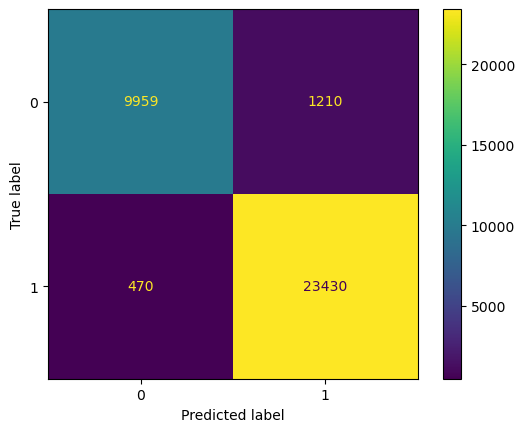

In [ ]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

RandomForest classifier worked exceptionally! 

It achieved a 95% accuracy, with particularly strong performance in detecting attacks (98% recall and 95% precision). Although 11% of benign traffic was misclassified as malicious, the overall model shows high reliability in intrusion detection, potentially making it a strong candidate for real-time or batch detection tasks.

I'll have to review feature engineering and feature selction to be sure. Suspect overfitting?

## Beth

In [ ]:
beth_df.shape

(763144, 16)

In [ ]:
beth_df.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [ ]:
beth_df = beth_df.drop(['timestamp', 'stackAddresses', 'args', 'hostName','processId', 'threadId', 'parentProcessId', 'userId', 'mountNamespace'], axis=1)
# columns related to Ids, names, processess, addresses and to large to encode

In [ ]:
for col in ['processName', 'eventName']:
    beth_df[col] = LabelEncoder().fit_transform(beth_df[col])

In [ ]:
beth_df.isna().sum()

processName    0
eventId        0
eventName      0
argsNum        0
returnValue    0
sus            0
evil           0
dtype: int64

In [ ]:
beth_df['sus'].value_counts()

sus
0    761875
1      1269
Name: count, dtype: int64

In [ ]:
beth_df = beth_df.drop('evil', axis=1)

In [ ]:
X = beth_df.drop(['sus'], axis=1)
y = beth_df['sus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define parameter distributions
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,  # Try 30 random combinations
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/mickalangelo/anaconda3/envs/BU/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1461697d0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146150210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146105550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146168250>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_


Best Parameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 700}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152409
           1       0.90      0.43      0.58       220

    accuracy                           1.00    152629
   macro avg       0.95      0.72      0.79    152629
weighted avg       1.00      1.00      1.00    152629



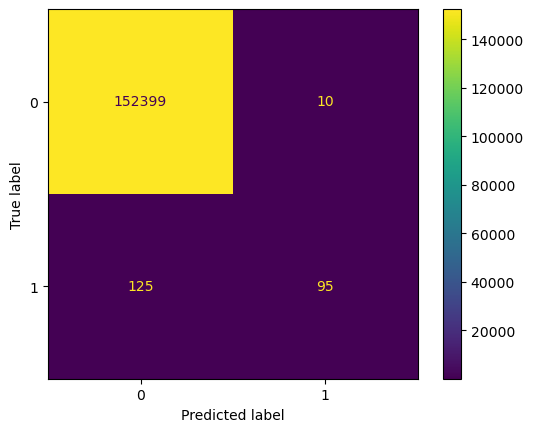

In [ ]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

The model achieved near-perfect overall accuracy, with a precision of 90% for identifying suspicious activity. However, its recall for suspicious activity was 43%, meaning the model correctly identified fewer than half of all actual suspicious events. While it is highly effective at avoiding false positives, it may underperform in real-time detection scenarios where missing suspicious behavior is costly. To improve its utility in intrusion detection or behavioral monitoring, I will further tune to address class imbalance.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

**There are no charts in which I can reproduce within p.165-185.**